In [2]:
import pandas as pd   
import numpy as np    
import matplotlib.pyplot as plt

**Read the data from the Url**<br>
http://unsaidtalks.com/wp-content/uploads/2017/07/fruit_data_with_colors.txt

In [3]:
data=pd.read_table('http://unsaidtalks.com/wp-content/uploads/2017/07/fruit_data_with_colors.txt')

In [4]:
data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
fruit_label      59 non-null int64
fruit_name       59 non-null object
fruit_subtype    59 non-null object
mass             59 non-null int64
width            59 non-null float64
height           59 non-null float64
color_score      59 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.3+ KB


**Get the unique values from the dataframe**

In [6]:
unique_fruits=dict(zip(data.fruit_label.unique(),data.fruit_name.unique()))
print(unique_fruits)

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}


**Average weight in each fruit catagory**

In [7]:
data.groupby('fruit_name').agg({'mass':np.average})

,mass
fruit_name,
apple,165.052632
lemon,150.000000
mandarin,81.200000
orange,193.789474


**Count of each fruit subtype from each fruit catagory**

In [8]:
data.groupby(['fruit_name','fruit_subtype']).agg({'fruit_subtype':'count'})

fruit_subtype
fruit_name fruit_subtype                  
apple      braeburn                      5
           cripps_pink                   6
           golden_delicious              5
           granny_smith                  3
lemon      spanish_belsan                6
           unknown                      10
mandarin   mandarin                      5
orange     selected_seconds              6
           spanish_jumbo                 3
           turkey_navel                 10

**Adding color name for each value based on color score**

In [9]:
data['color']=np.NaN
data.loc[((data['color_score'] > 0.85) & (data['color_score'] < 1.0)),['color']]="Red"
data.loc[((data['color_score'] > 0.75) & (data['color_score'] < 0.85)),['color']]="Orange"
data.loc[((data['color_score'] > 0.65) & (data['color_score'] < 0.75)),['color']]="Yellow"
data.loc[((data['color_score'] > 0.45) & (data['color_score'] < 0.65)),['color']]="Green"

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 8 columns):
fruit_label      59 non-null int64
fruit_name       59 non-null object
fruit_subtype    59 non-null object
mass             59 non-null int64
width            59 non-null float64
height           59 non-null float64
color_score      59 non-null float64
color            53 non-null object
dtypes: float64(3), int64(2), object(3)
memory usage: 3.8+ KB


**Fetch the null values in color column**

In [11]:
data.loc[data['color'].isnull()]

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score,color
19,1,apple,cripps_pink,162,7.4,7.2,0.85,NaN
24,3,orange,spanish_jumbo,342,9.0,9.4,0.75,NaN
25,3,orange,spanish_jumbo,356,9.2,9.2,0.75,NaN
34,3,orange,turkey_navel,142,7.6,7.8,0.75,NaN
35,3,orange,turkey_navel,150,7.1,7.9,0.75,NaN
39,3,orange,turkey_navel,144,6.8,7.4,0.75,NaN


Filling the missing values using "bfill" function

In [12]:
data['color'].fillna(method='bfill',inplace=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 8 columns):
fruit_label      59 non-null int64
fruit_name       59 non-null object
fruit_subtype    59 non-null object
mass             59 non-null int64
width            59 non-null float64
height           59 non-null float64
color_score      59 non-null float64
color            59 non-null object
dtypes: float64(3), int64(2), object(3)
memory usage: 3.8+ KB


In [14]:
data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score,color
0,1,apple,granny_smith,192,8.4,7.3,0.55,Green
1,1,apple,granny_smith,180,8.0,6.8,0.59,Green
2,1,apple,granny_smith,176,7.4,7.2,0.60,Green
3,2,mandarin,mandarin,86,6.2,4.7,0.80,Orange
4,2,mandarin,mandarin,84,6.0,4.6,0.79,Orange


**Data Visualization**

Text(0, 0.5, 'Count')

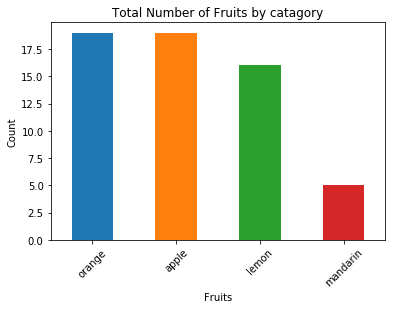

In [15]:
data['fruit_name'].value_counts().plot(kind='bar')
plt.title("Total Number of Fruits by catagory")
plt.xticks(rotation=45,horizontalalignment="center")
plt.xlabel("Fruits")
plt.ylabel("Count")

Text(0.5, 1.0, 'Percentage of Fruits by catagory')

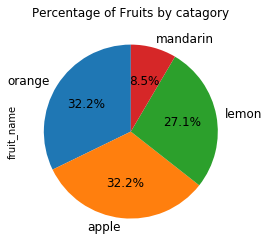

In [16]:
data['fruit_name'].value_counts().plot(kind='pie',autopct='%1.1f%%',fontsize=12,startangle=90)
plt.title("Percentage of Fruits by catagory")